### Imports

In [1]:
from subprocess import Popen, PIPE, STDOUT
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt 
import pdb

### Interfacing with the Java implementation of the Negative Selection algorithm

In [2]:
def get_negsel_outputs(test_filename, train_filename="english.train", 
                       n=10, r=4, c=True, l=True, notebook_in_folder=False):
    
    # Fix command for when notebook is not inside the negative-selection folder
    folder_prefix = "negative-selection/" if not notebook_in_folder else ""
    
    # Create command using given filenames and parameters
    command = f"java -jar {folder_prefix}negsel2.jar " \
              f"-self {folder_prefix}{train_filename} " \
              f"-n {n} -r {r} {'-c' if c else ''} {'-l' if l else ''} " \
              f"< {folder_prefix}{test_filename}"
    
    # Run the command
    process = Popen(command, stdout=PIPE, shell=True, stderr=STDOUT, bufsize=2, close_fds=True)
    
    # Extract and return output values
    outputs = [float(line.rstrip().decode('utf-8')) for line in iter(process.stdout.readline, b'')]
    return outputs

### Running the algorithm

In [3]:
english_outputs = get_negsel_outputs("english.test")
tagalog_outputs = get_negsel_outputs("tagalog.test")

### Merging Test Sets

In [4]:
# # First: Merge two test files:
# data = data2 = ""

# # Reading data from file1 
# with open('negative-selection/english.test') as fp: 
#     data = fp.read()
    
# # Reading data from file2 
# with open('negative-selection/tagalog.test') as fp: 
#     data2 = fp.read() 

# # Merging 2 files 
# # To add the data of file2 
# # from next line 
# # data += "\n"
# data += data2 

# with open ('negative-selection/merged.test', 'w') as fp: 
#     fp.write(data) 

In [5]:
# with open('negative-selection/merged.test') as fp:
#     data = fp.read()
# print(data)

### Computing ROC-AUC

In [6]:
"""
    normal strings = self = english
    anomalous strings = non-self/foreign/other = tagalog
    
    cut-off score = (each distinct value in anomaly scores list)
    
    
    sensitivity = percentage of anomalous strings higher than cut off score
    specificity = percentage of normal strings lower than cut off score
    
    To calculate AUC you need ROC and for ROC you need TPR and FPR, 
    TPR = sensitivity
    FPR = 1 - specificty
    
    compute AUC 
    1. merge two test string sets (direction not specified..)
    2. sort merged sets
    3. determine cut off scores
    
    4. for each score in cut off scores
        4i. compute sensitivity
        4ii. compute specificity

"""




def roc_auc(self, other,title = 'Beautiful ROC Curve: For Beautiful People, By Beautiful People'):
    sensitivity = []
    specificity = []
    
    # Merge outputs
    merged_outputs = self + other
    sorted_merged_outputs = sorted(merged_outputs)
    cut_off_scores = list(set(sorted_merged_outputs))

    for cut_off_score in cut_off_scores:
        # For each cut_off_score in merged_outputs: calculate percentage of values in other that are larger
        sensitivity_v = len([x for x in other if x > cut_off_score]) / len(other)

        # For each cut_off_score in merged_outputs: calculate percentage of values in self that are smaller
        specificity_v = len([x for x in self if x < cut_off_score]) / len(self)
        
        # Keep track of these values
        sensitivity.append(sensitivity_v)
        specificity.append(specificity_v)
    ## AUC = auc(fpr, tpr) FPR = 1-specicity, TPR = Sensitivity
    ## I think it should be AUC ( specificity, sensitivity)
    FPR = [1 - x for x in specificity]
    plt.plot(sorted(FPR),sorted(sensitivity))
    plt.plot([0.0, 1.0], [0.0,1.0], ls='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('Sensitivity')
    plt.title(title)
    plt.show()
    ## AUC = auc(fpr, tpr) FPR = 1-specicity TPR = Sensitivity
    ## I think it should be AUC ( specificity, sensitivity)
    print("ROC-AUC = {}".format(auc(sorted(FPR),sorted(sensitivity))))

## Assignment 1.1: ROC-AUC with $n$ = 10, $r$ = 4

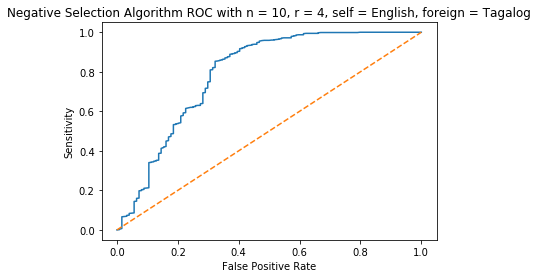

ROC-AUC = 0.7911483962092218


In [7]:
# get sorted output on test sets
english_outputs = get_negsel_outputs("english.test",r=4)
tagalog_outputs = get_negsel_outputs("tagalog.test",r=4)

# get ROC-AUC
roc_auc(english_outputs, tagalog_outputs, 
        title="Negative Selection Algorithm ROC with n = 10, r = 4, self = English, foreign = Tagalog")

## Assignment 1.2: Influence of $r$

### ROC-AUC with $n$ = 10, $r$ = 1

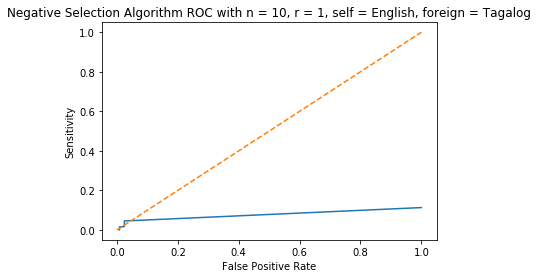

ROC-AUC = 0.07744441406961909


In [8]:
# get sorted output on test sets
english_outputs = get_negsel_outputs("english.test",r=1)
tagalog_outputs = get_negsel_outputs("tagalog.test",r=1)

# get ROC-AUC
roc_auc(english_outputs, tagalog_outputs, 
        title="Negative Selection Algorithm ROC with n = 10, r = 1, self = English, foreign = Tagalog")

### ROC-AUC with $n$ = 10, $r$ = 9

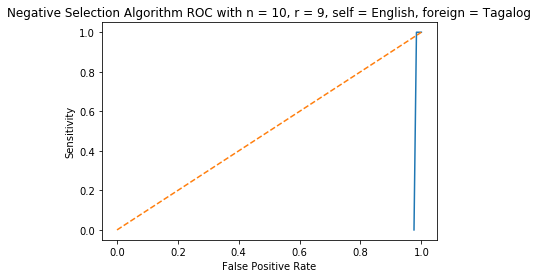

ROC-AUC = 0.020161290322580627


In [9]:
# get sorted output on test sets
english_outputs = get_negsel_outputs("english.test",r=9)
tagalog_outputs = get_negsel_outputs("tagalog.test",r=9)

# get ROC-AUC
roc_auc(english_outputs, tagalog_outputs, 
        title="Negative Selection Algorithm ROC with n = 10, r = 9, self = English, foreign = Tagalog")

## Assignment 1.3: Testing with different languages

### Hiligaynon

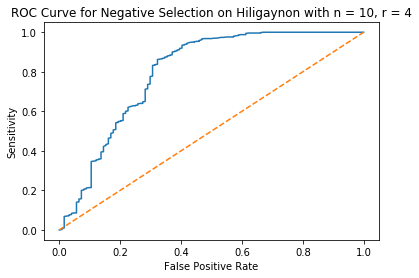

ROC-AUC = 0.7968951612903227


In [10]:
# get sorted output on test sets
english_outputs = get_negsel_outputs("english.test",r=4)
hiligaynon_outputs = get_negsel_outputs("lang/hiligaynon.txt",r=4)

# get ROC-AUC
roc_auc(english_outputs, hiligaynon_outputs, 
        title = "ROC Curve for Negative Selection on Hiligaynon with n = 10, r = 4")

### Middle-English

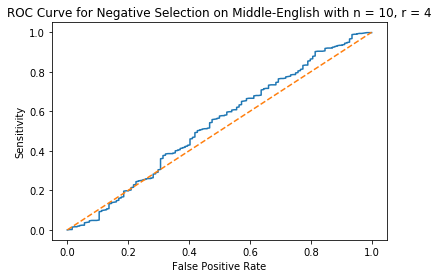

ROC-AUC = 0.5331209677419355


In [11]:
# get sorted output on merged test set

english_outputs = get_negsel_outputs("english.test",r=4)
middle_english_outputs = get_negsel_outputs("lang/middle-english.txt", r = 4)

# get ROC-AUC
roc_auc(english_outputs, middle_english_outputs, 
        title = "ROC Curve for Negative Selection on Middle-English with n = 10, r = 4")

### Plautdietsch

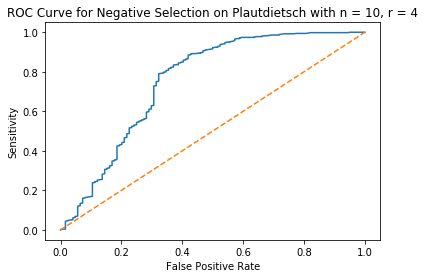

ROC-AUC = 0.752766129032258


In [12]:
# get sorted output on merged test set

english_outputs = get_negsel_outputs("english.test",r=4)
plautdietsch_outputs = get_negsel_outputs("lang/plautdietsch.txt", r = 4)

# get ROC-AUC
roc_auc(english_outputs, plautdietsch_outputs, 
        title = "ROC Curve for Negative Selection on Plautdietsch with n = 10, r = 4")


### Xhosa

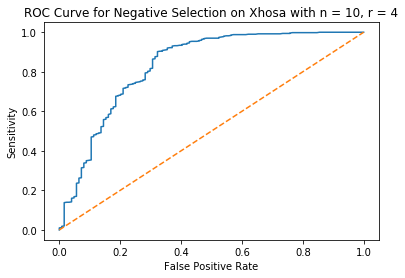

ROC-AUC = 0.8317661290322579


In [13]:
# get sorted output on merged test set
english_outputs = get_negsel_outputs("english.test",r=4)
xhosa_outputs = get_negsel_outputs("lang/xhosa.txt", r = 4)

# get ROC-AUC
roc_auc(english_outputs, xhosa_outputs, 
        title = "ROC Curve for Negative Selection on Xhosa with n = 10, r = 4")


The easiest distinguishable languages that can be discriminated from English are Hiligaynon, Plautdietsch and  Xhosa. While English belongs to the family of Indoeuropean Germanic languages, Hiligaynon and Xhosa belong to the Austronesean and Niger-Congo families respectively. The differences between English and Hiligaynon or Xhose are probably quite large. On the other hand, Plautdietsch has a more similar language family tree to English, but it is still quite different from English.

The most difficult language to distinguish from English is Middle English. The reason for this is that Middle English is a direct predecessor of Modern English, hence it is very similar to Modern Englis which makes it hard to distinguish the two.